In [1]:
import pickle
import os
import pandas as pd
import seaborn as sns

In [2]:
results = []
for dock_id in os.listdir('gold_docking_postprocessing') :
    result_path = os.path.join('gold_docking_postprocessing', dock_id, 'results.p')
    if os.path.exists(result_path) :
        with open(result_path, 'rb') as f :
            result_d = pickle.load(f)
            results.append(result_d)

In [3]:
len(results)

1080

In [4]:
rankers = ['score', 'model', 'energy']
df = pd.DataFrame()
for result in results :
    for ranker in rankers :
        result['ranking'][ranker]['ranker'] = ranker
        df = df.append(result['ranking'][ranker], ignore_index=True)

In [5]:
df.head()

,best_pose,docking_power,min_rmsd,min_rmsd_top_pose,ranker,top_score,top_score_pose
0,<rdkit.Chem.rdchem.Mol object at 0x7f32f7c98e70>,1.0,0.527350,0.527350,score,115.0376,<rdkit.Chem.rdchem.Mol object at 0x7f32f8177230>
1,<rdkit.Chem.rdchem.Mol object at 0x7f32f19661f0>,1.0,0.378794,0.527350,model,115.0376,<rdkit.Chem.rdchem.Mol object at 0x7f32f7c98fb0>
2,<rdkit.Chem.rdchem.Mol object at 0x7f32f7c99330>,1.0,0.597173,0.733165,energy,114.2543,<rdkit.Chem.rdchem.Mol object at 0x7f32f5de4d70>
3,None,0.0,0.996249,6.648319,score,50.4844,None
4,None,1.0,0.996249,0.996249,model,49.5511,None


<AxesSubplot:xlabel='ranker', ylabel='top_score'>

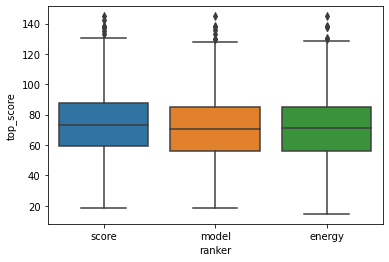

In [6]:
sns.boxplot(data=df, x='ranker', y='top_score')

<AxesSubplot:xlabel='ranker', ylabel='min_rmsd'>

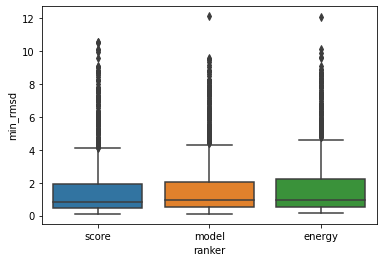

In [7]:
sns.boxplot(data=df, x='ranker', y='min_rmsd')

<AxesSubplot:xlabel='ranker', ylabel='docking_power'>

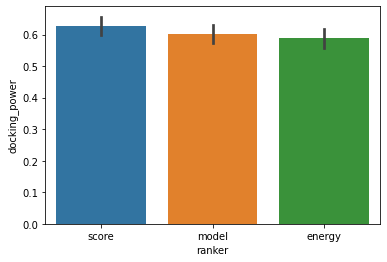

In [8]:
sns.barplot(data=df, x='ranker', y='docking_power')